In [1]:
import seaborn as sns
from cleaning import load_arff_files
dfs, dirs = load_arff_files("../data/raw_data/")

In [6]:
year_one = dfs[0]
year_one.head()
# class is stored binary, need to convert it to an integer

,net profit / total assets,total liabilities / total assets,working capital / total assets,current assets / short-term liabilities,[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365,retained earnings / total assets,EBIT / total assets,book value of equity / total liabilities,sales / total assets,equity / total assets,...,(sales - cost of products sold) / sales,(current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation),total costs /total sales,long-term liabilities / equity,sales / inventory,sales / receivables,(short-term liabilities *365) / sales,sales / short-term liabilities,sales / fixed assets,class
0,0.200550,0.37951,0.39641,2.0472,32.3510,0.38825,0.249760,1.33050,1.1389,0.50494,...,0.121960,0.39718,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.4277,b'0'
1,0.209120,0.49988,0.47225,1.9447,14.7860,0.00000,0.258340,0.99601,1.6996,0.49788,...,0.121300,0.42002,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.9870,b'0'
2,0.248660,0.69592,0.26713,1.5548,-1.1523,0.00000,0.309060,0.43695,1.3090,0.30408,...,0.241140,0.81774,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.2078,b'0'
3,0.081483,0.30734,0.45879,2.4928,51.9520,0.14988,0.092704,1.86610,1.0571,0.57353,...,0.054015,0.14207,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.5497,b'0'
4,0.187320,0.61323,0.22960,1.4063,-7.3128,0.18732,0.187320,0.63070,1.1559,0.38677,...,0.134850,0.48431,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.8980,b'0'


In [7]:
year_one.describe()
# We have all numerical columns. No categorical/character columns.
# There seems to be some Missing values present. Lets observe them 

,net profit / total assets,total liabilities / total assets,working capital / total assets,current assets / short-term liabilities,[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365,retained earnings / total assets,EBIT / total assets,book value of equity / total liabilities,sales / total assets,equity / total assets,...,working capital,(sales - cost of products sold) / sales,(current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation),total costs /total sales,long-term liabilities / equity,sales / inventory,sales / receivables,(short-term liabilities *365) / sales,sales / short-term liabilities,sales / fixed assets
count,7024.000000,7024.000000,7024.000000,6997.000000,7.019000e+03,7024.000000,7024.000000,7002.000000,7026.000000,7024.000000,...,7.027000e+03,7.027000e+03,7026.000000,7.027000e+03,7026.000000,6.892000e+03,7005.000000,7.027000e+03,6997.000000,6993.000000
mean,0.034660,0.560215,0.119969,2.629143,-2.631672e+02,0.059712,0.313876,2.623996,5.552855,1.825832,...,8.855693e+03,-1.577367e+02,0.193243,1.587409e+02,0.277829,4.328830e+02,15.642228,4.763202e+03,8.126852,208.731950
std,4.565504,5.350084,5.275459,13.257356,3.707460e+04,6.051113,8.353274,18.708327,101.995448,33.836452,...,7.247527e+04,1.322125e+04,4.344046,1.322124e+04,6.339149,2.612802e+04,261.554534,3.107835e+05,19.996419,5140.708804
min,-256.890000,-72.162000,-440.500000,0.000000,-2.722100e+06,-397.890000,-189.560000,-141.410000,0.000005,-440.550000,...,-8.004700e+05,-1.108300e+06,-315.370000,-4.194000e-03,-327.970000,4.700000e-05,0.000016,0.000000e+00,0.000015,0.000010
25%,0.021182,0.296678,0.026968,1.063100,-4.449800e+01,0.000000,0.028023,0.445710,1.037225,0.300785,...,9.712000e+01,2.031450e-02,0.056772,8.647650e-01,0.000000,5.923950e+00,4.829000,4.322250e+01,3.425400,2.538600
50%,0.075802,0.482960,0.181275,1.502000,-5.373900e+00,0.000000,0.090109,1.015100,1.205750,0.492235,...,1.604800e+03,6.338200e-02,0.175745,9.388100e-01,0.028438,1.004050e+01,7.033700,6.850900e+01,5.303200,4.637700
75%,0.160268,0.680233,0.362548,2.460700,3.777050e+01,0.146660,0.188667,2.267675,2.132975,0.675677,...,5.955900e+03,1.376950e-01,0.351922,9.820150e-01,0.273867,2.013900e+01,10.703000,1.063350e+02,8.357900,9.782200
max,94.280000,441.500000,1.000000,1017.800000,9.909000e+05,303.670000,453.770000,1452.200000,3876.100000,1099.500000,...,4.398400e+06,1.000000e+00,126.670000,1.108300e+06,119.580000,2.137800e+06,21110.000000,2.501600e+07,1042.200000,294770.000000


In [14]:
number_nas = year_one.isnull().sum(axis=0)
for na, col in zip(number_nas, year_one.columns):
    print("{} / {} % missing values in column {}".format(na, round(na/year_one.shape[0]*100, 2), col[:60]))

3 / 0.04 % missing values in column net profit / total assets 
3 / 0.04 % missing values in column total liabilities / total assets 
3 / 0.04 % missing values in column working capital / total assets 
30 / 0.43 % missing values in column current assets / short-term liabilities 
8 / 0.11 % missing values in column [(cash + short-term securities + receivables - short-term li
3 / 0.04 % missing values in column retained earnings / total assets 
3 / 0.04 % missing values in column EBIT / total assets 
25 / 0.36 % missing values in column book value of equity / total liabilities 
1 / 0.01 % missing values in column sales / total assets 
3 / 0.04 % missing values in column equity / total assets 
39 / 0.56 % missing values in column (gross profit + extraordinary items + financial expenses) / 
30 / 0.43 % missing values in column gross profit / short-term liabilities 
0 / 0.0 % missing values in column (gross profit + depreciation) / sales 
3 / 0.04 % missing values in column (gross profit + i

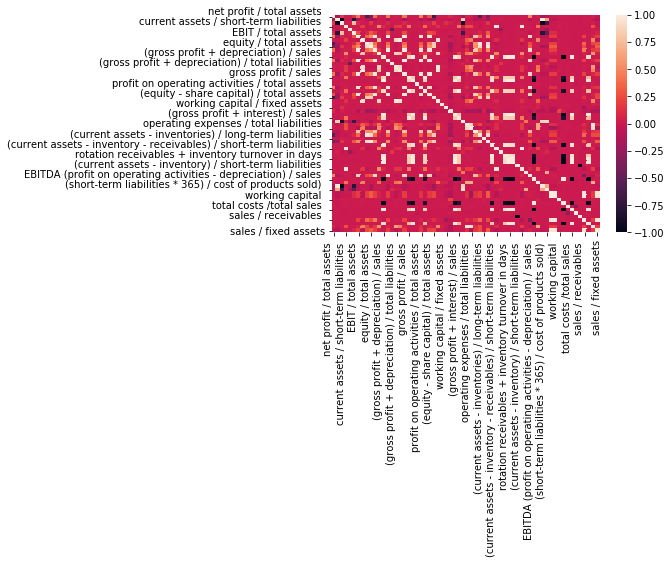

In [5]:

sns.heatmap(year_one.corr())